# Análisis de componentes principales (PCA)

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Introducción

### Varianza y Covarianza

In [2]:
x = np.array([[2,     2.2,  2.4, 1.9],
              [0,     0.2,  0.2, 0],
              [-1.4, -1.5, -1,  -1.2]])
        
print np.cov(x)

[[ 0.04916667  0.02333333  0.01916667]
 [ 0.02333333  0.01333333  0.00333333]
 [ 0.01916667  0.00333333  0.04916667]]


In [3]:
print np.cov(x.T)

[[ 2.92        3.16        2.94        2.67      ]
 [ 3.16        3.43        3.17        2.885     ]
 [ 2.94        3.17        2.97333333  2.69333333]
 [ 2.67        2.885       2.69333333  2.44333333]]


### Vectores propios y valores propios

In [4]:
x = np.array([[1, -2],
              [2, -3]])

l, v = np.linalg.eig(x)

print "Vectores propios:", v
print "Valores propios: ", l

Vectores propios: [[ 0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Valores propios:  [-0.99999998 -1.00000002]


## Reducción de la dimensinalidad con PCA

In [5]:
x = np.array([[0.9, 1],
              [2.4, 2.6],
              [1.2, 1.7],
              [0.5, 0.7],
              [0.3, 0.7],
              [1.8, 1.4],
              [0.5, 0.6],
              [0.3, 0.6],
              [2.5, 2.6],
              [1.3, 1.1]])

y = np.array([x.T[0] - mean(x.T[0]),
              x.T[1] - mean(x.T[1])])
c = np.cov(y)

l, v = np.linalg.eig(c)

print 

print "Primer componente: ", dot(y.T, v.T[0])
print "Segundo componente: ", -dot(y.T, v.T[1])


Primer componente:  [-0.40200434  1.78596968  0.29427599 -0.89923557 -1.04573848  0.5295593
 -0.96731071 -1.11381362  1.85922114 -0.04092339]
Segundo componente:  [ 0.03595149 -0.1149447  -0.27258328 -0.0165947  -0.15274498  0.35562192
  0.05665675 -0.07949352 -0.04686956  0.23500059]


Utilizando `sklearn`

In [6]:
from sklearn.decomposition import PCA
print PCA(n_components=2).fit_transform(x)

[[-0.40200434  0.03595149]
 [ 1.78596968 -0.1149447 ]
 [ 0.29427599 -0.27258328]
 [-0.89923557 -0.0165947 ]
 [-1.04573848 -0.15274498]
 [ 0.5295593   0.35562192]
 [-0.96731071  0.05665675]
 [-1.11381362 -0.07949352]
 [ 1.85922114 -0.04686956]
 [-0.04092339  0.23500059]]


## Aplicaciones

### Utilización PCA para visualizar datos

Se importa el conjunto de datos de iris que contiene 4 medidas de 150 variedades de flores correspondientes a tres tipos de flores

In [7]:
from sklearn import datasets

iris_names  = datasets.load_iris().target_names
iris_target = datasets.load_iris().target
iris_values = datasets.load_iris().data

print iris_values[0:5, :]

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


#### Representación de los datos en dos dimensiones

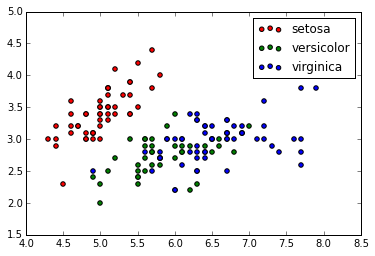

In [8]:
scatter(iris_values[iris_target == 0, 0], iris_values[iris_target == 0, 1], c='r')
scatter(iris_values[iris_target == 1, 0], iris_values[iris_target == 1, 1], c='g')
scatter(iris_values[iris_target == 2, 0], iris_values[iris_target == 2, 1], c='b')
legend(iris_names)

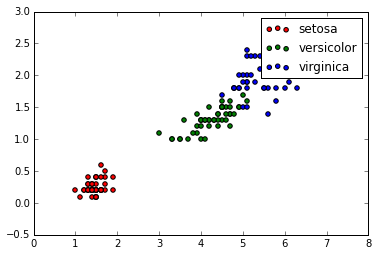

In [9]:
scatter(iris_values[iris_target == 0, 2], iris_values[iris_target == 0, 3], c='r')
scatter(iris_values[iris_target == 1, 2], iris_values[iris_target == 1, 3], c='g')
scatter(iris_values[iris_target == 2, 2], iris_values[iris_target == 2, 3], c='b')
legend(iris_names)

#### Utilización de PCA para la selección de las componentes que explican la mayo variabilidad

In [10]:
pca      = PCA(n_components = None)
iris_pca = pca.fit_transform(iris_values)

for i in range(shape(iris_pca)[1]):
    print "Varianza explicada con", i + 1, "componentes:", pca.explained_variance_ratio_[range(i + 1)].sum()

Varianza explicada con 1 componentes: 0.924616207174
Varianza explicada con 2 componentes: 0.977631775025
Varianza explicada con 3 componentes: 0.99481691455
Varianza explicada con 4 componentes: 1.0


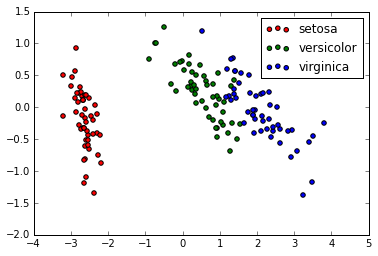

In [11]:
scatter(iris_pca[iris_target == 0, 0], iris_pca[iris_target == 0, 1], c='r')
scatter(iris_pca[iris_target == 1, 0], iris_pca[iris_target == 1, 1], c='g')
scatter(iris_pca[iris_target == 2, 0], iris_pca[iris_target == 2, 1], c='b')
legend(iris_names)